In [1]:
from rascil.processing_components import image
import numpy as np
import xarray as xr

The RASCIL data directory is not available - continuing but any simulations will fail


In [2]:
from karabo.simulation.sky_model import SkyModel

In [3]:
sky_model = SkyModel.get_MGCLS_data('Abell_(?:2744)_.+_I_.+')

Getting 1 files.


In [4]:
data_arr = sky_model[0]

In [9]:
data_arr.frequency[0]

<xarray.DataArray 'frequency' ()>
array(1.28379102e+09)
Coordinates:
    frequency  float64 1.284e+09

In [10]:
filtered = data_arr.sel({'frequency': data_arr.frequency[0], 'polarisation': 'I'})

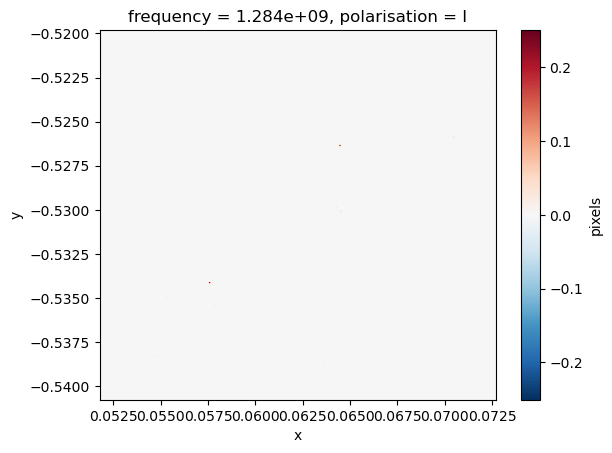

In [13]:
filtered['pixels'].plot.imshow()

In [8]:
import numpy as np

# RA axis parameters
ra_center = header['CRVAL1']
ra_increment = header['CDELT1']
ra_length = header['NAXIS1']

# DEC axis parameters
dec_center = header['CRVAL2']
dec_increment = header['CDELT2']
dec_length = header['NAXIS2']

# Calculate the start and end values for RA
ra_start = ra_center - (ra_length // 2) * ra_increment
ra_end = ra_center + (ra_length // 2) * ra_increment

# Calculate the start and end values for DEC
dec_start = dec_center - (dec_length // 2) * dec_increment
dec_end = dec_center + (dec_length // 2) * dec_increment

# Create the numpy arrays for RA and DEC
num_ra_points = ra_length
num_dec_points = dec_length

ra_values = np.linspace(ra_start, ra_end, ra_length)
dec_values = np.linspace(dec_start, dec_end, dec_length)

In [9]:
ra_center

3.567029999999667

In [10]:
ra_start

4.166965803199667

In [11]:
ra_values.mean()

3.567029999999667

In [12]:
data_arr[0].data[0].shape

(5, 3617, 3617)

In [13]:
data_arr_2 = xr.Dataset(
    data_vars={'pixels': (('5pln', 'ra', 'dec'), data_arr[0].data[0])},
                        coords={'ra': ra_values, 'dec': dec_values, '5pln': ['brightness', 'spectral index', 'brightness uncertainty', 'spectral index uncertainty', 'X**2']})

In [14]:
data_arr_2

<xarray.Dataset>
Dimensions:  (5pln: 5, ra: 3617, dec: 3617)
Coordinates:
  * ra       (ra) float64 4.167 4.167 4.166 4.166 ... 2.968 2.968 2.967 2.967
  * dec      (dec) float64 -30.98 -30.98 -30.98 -30.98 ... -29.78 -29.78 -29.78
  * 5pln     (5pln) <U26 'brightness' 'spectral index' ... 'X**2'
Data variables:
    pixels   (5pln, ra, dec) >f4 -9.134e-06 -8.339e-06 ... 0.07215 0.05407

In [15]:
brightness_subset = data_arr_2.sel({'5pln': 'brightness'}, drop=True)

In [16]:
import pandas as pd
df = brightness_subset.to_dataframe()

In [17]:
for col in df.columns:
    if df[col].dtype.byteorder == '>':
        print(col)
        df[col] = df[col].values.byteswap().newbyteorder()


pixels


In [18]:
df

pixels
ra       dec                 
4.166966 -30.982918 -0.000009
         -30.982586 -0.000008
         -30.982254 -0.000007
         -30.981923 -0.000005
         -30.981591 -0.000002
...                       ...
2.967094 -29.784374 -0.000014
         -29.784042 -0.000017
         -29.783710 -0.000019
         -29.783378 -0.000020
         -29.783046 -0.000019

[13082689 rows x 1 columns]

In [19]:
# Assuming your DataFrame is named df
df_wide = df.reset_index().pivot(index='ra', columns='dec', values='pixels')


In [22]:
import matplotlib.pyplot as plt

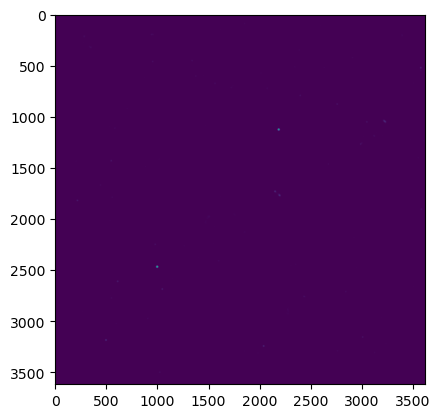

In [26]:
plt.imshow(df_wide.values)

In [ ]:
# Assuming your DataFrame is named df
df_wide = brightness_subset.to_dataframe().reset_index().pivot(index='ra', columns='dec', values='pixels')


In [27]:
brightness_subset.plot.imshow(x='ra', y='dec', hue='pixels')

AttributeError: 'DatasetPlotAccessor' object has no attribute 'imshow'

In [31]:
brightness_subset.to_array()

<xarray.DataArray (variable: 1, ra: 3617, dec: 3617)>
array([[[-9.1336115e-06, -8.3387176e-06, -6.7863484e-06, ...,
         -1.5724159e-05, -1.3915609e-05, -1.2052070e-05],
        [-1.0260764e-05, -9.3788758e-06, -7.6542792e-06, ...,
         -1.7490454e-05, -1.5418529e-05, -1.3309130e-05],
        [-1.1058761e-05, -1.0096979e-05, -8.2299257e-06, ...,
         -1.8682669e-05, -1.6383503e-05, -1.4077302e-05],
        ...,
        [-1.7125698e-05, -2.0823825e-05, -2.4673280e-05, ...,
         -2.4350826e-05, -2.5165526e-05, -2.4481853e-05],
        [-1.5784830e-05, -1.9063527e-05, -2.2422628e-05, ...,
         -2.1953943e-05, -2.2646886e-05, -2.2001934e-05],
        [-1.3975196e-05, -1.6783442e-05, -1.9618356e-05, ...,
         -1.9218605e-05, -1.9773559e-05, -1.9174129e-05]]], dtype=float32)
Coordinates:
  * ra        (ra) float64 4.167 4.167 4.166 4.166 ... 2.968 2.968 2.967 2.967
  * dec       (dec) float64 -30.98 -30.98 -30.98 -30.98 ... -29.78 -29.78 -29.78
  * variable  (variable) object 'pixels'

In [37]:
da = brightness_subset.to_array()

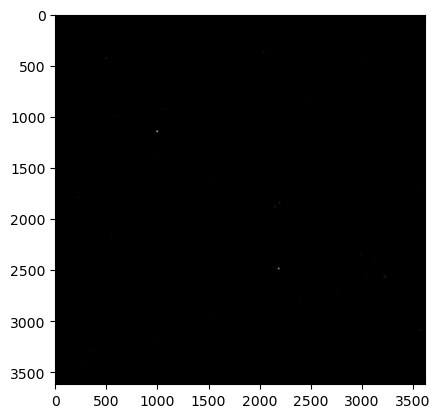

In [49]:
plt.imshow(da.values[0], cmap='gray')

In [34]:
xr.plot.imshow(brightness_subset.to_array(), x='ra', y='dec', colors='pixels')

ValueError: A 3-dimensional array was passed to imshow(), but there is no dimension that could be color.  At least one dimension must be of size 3 (RGB) or 4 (RGBA), and not given as x or y.

In [62]:
xr_data.pixels[np.where(xr_data.ra > 0.0621)[0]]

MemoryError: Unable to allocate 89.4 GiB for an array with shape (1835, 1, 3617, 3617) and data type >f4

In [19]:
# Get the header and data from the primary FITS extension
header = sky_model[0][0].header
data = sky_model[0][0].data

# Assuming your data is 4D as per your header, assign dimensions
dims = ['STOKES', 'SPECLNMF', 'DEC', 'RA']

# Create coordinate arrays for each dimension, based on your header
coords = {
    'STOKES': np.arange(header['CRVAL4'], header['CRVAL4'] + header['NAXIS4'] * header['CDELT4'], header['CDELT4']),
    'SPECLNMF': np.arange(header['CRVAL3'], header['CRVAL3'] + header['NAXIS3'] * header['CDELT3'], header['CDELT3']),
    'DEC': np.arange(header['CRVAL2'], header['CRVAL2'] + header['NAXIS2'] * header['CDELT2'], header['CDELT2']),
    'RA': np.arange(header['CRVAL1'], header['CRVAL1'] + header['NAXIS1'] * header['CDELT1'], header['CDELT1']),
}

# Create the xarray DataArray
da = xr.DataArray(data, coords=coords, dims=dims)

ValueError: conflicting sizes for dimension 'DEC': length 3617 on the data but length 3618 on coordinate 'DEC'

In [20]:
coords

{'STOKES': array([1.]),
 'SPECLNMF': array([1.28379102e+09, 1.34134210e+09, 1.39889318e+09, 1.45644426e+09,
        1.51399534e+09]),
 'DEC': array([-13.57629806, -13.57596628, -13.5756345 , ..., -12.37692529,
        -12.37659351, -12.37626173]),
 'RA': array([22.98950361, 22.98917183, 22.98884006, ..., 21.79013084,
        21.78979906, 21.78946729])}

In [16]:
sky_model[0][1].data

FITS_rec([('AIPS   CLEAN BMAJ=  2.1109e-03 BMIN=  2.0543e-03 BPA=  -6.62',),
          ('AIPS   CLEAN NITER=    32770',),
          ('AIPS   IMAGE ITYPE=1 XPOFF=      0.00000000 YPOFF=      0.00000000',),
          ('AIPS   CLEAN BMAJ=  2.1109e-03 BMIN=  2.0543e-03 BPA=  -6.62',),
          ('AIPS   CLEAN NITER=    32770',),
          ('AIPS   IMAGE ITYPE=1 XPOFF=      0.00000000 YPOFF=      0.00000000',),
          ('   / 2020-08-20T21:43:55  Start Obit task TabCopy  svn ver. 622M',),
          ("TabCopy DataType='AIPS'",), ("TabCopy inFile=' '",),
          ('TabCopy inDisk =  2',), ("TabCopy inName='Abell_209'",),
          ("TabCopy inClass='MFImag'",), ('TabCopy inSeq =  1',),
          ("TabCopy inTab='AIPS SN'",), ('TabCopy inVer =  1',),
          ('TabCopy nCopy =  2',), ("TabCopy outFile=' '",),
          ('TabCopy outDisk =  1',), ("TabCopy outName='Abell_209'",),
          ("TabCopy outClass='IPol'",), ('TabCopy outSeq =  1',),
          ('TabCopy outVer =  0',), ("TabCopy 

In [10]:
sky_model[0]

<xarray.Image>
Dimensions:       (frequency: 5, polarisation: 1, y: 3617, x: 3617)
Coordinates:
  * frequency     (frequency) float64 1.284e+09 1.341e+09 ... 1.514e+09
  * polarisation  (polarisation) <U1 'I'
  * y             (y) float64 -0.2474 -0.2474 -0.2474 ... -0.2265 -0.2265
  * x             (x) float64 0.3908 0.3908 0.3908 ... 0.4117 0.4117 0.4117
Data variables:
    pixels        (frequency, polarisation, y, x) >f4 -1.553e-05 ... 0.09394
Attributes:
    data_model:           Image
    _polarisation_frame:  stokesI
    _projection:          ('RA---SIN', 'DEC--SIN')
    spectral_type:        SPECLNMF
    clean_beam:           {'bmaj': 0.004166667, 'bmin': 0.004166667, 'bpa': 0.0}
    refpixel:             [1.809e+03 1.809e+03 1.000e+00 1.000e+00]
    channel_bandwidth:    57551080.0
    ra:                   0.4012425314129568
    dec:                  -0.23695110130156793

In [13]:
import numpy as np
0.23*180 / np.pi

13.178029288008934

In [11]:
sky_model[0].pixels.to_numpy()

array([[[[-1.00043799e-05, -1.04207447e-05, -1.05025047e-05, ...,
          -5.14592602e-06, -5.83054407e-06, -5.85003772e-06],
         [-1.22450592e-05, -1.29496802e-05, -1.32531304e-05, ...,
          -7.64125707e-06, -8.22275797e-06, -8.04966839e-06],
         [-1.45731892e-05, -1.56479309e-05, -1.62557899e-05, ...,
          -1.07426195e-05, -1.11303352e-05, -1.06836897e-05],
         ...,
         [ 2.36998912e-05,  2.62215744e-05,  2.75181919e-05, ...,
          -4.70247778e-06, -3.98295742e-06, -3.25983547e-06],
         [ 1.98833295e-05,  2.21431037e-05,  2.33295286e-05, ...,
          -3.15271950e-06, -2.60955994e-06, -2.08268011e-06],
         [ 1.61223215e-05,  1.80843781e-05,  1.91424588e-05, ...,
          -1.72314947e-06, -1.34770164e-06, -1.00466491e-06]]],


       [[[-6.00000024e-01, -6.00000024e-01, -6.00000024e-01, ...,
          -6.00000024e-01, -6.00000024e-01, -6.00000024e-01],
         [-6.00000024e-01, -6.00000024e-01, -6.00000024e-01, ...,
          -6.0000002

In [18]:
sky_model[1]

<xarray.Image>
Dimensions:       (frequency: 5, polarisation: 1, y: 3617, x: 3617)
Coordinates:
  * frequency     (frequency) float64 1.284e+09 1.341e+09 ... 1.514e+09
  * polarisation  (polarisation) <U1 'I'
  * y             (y) float64 -0.03443 -0.03443 -0.03442 ... -0.0135 -0.01349
  * x             (x) float64 0.3638 0.3638 0.3638 ... 0.3848 0.3848 0.3848
Data variables:
    pixels        (frequency, polarisation, y, x) >f4 3.189e-05 ... 0.0442
Attributes:
    data_model:           Image
    _polarisation_frame:  stokesI
    _projection:          ('RA---SIN', 'DEC--SIN')
    spectral_type:        SPECLNMF
    clean_beam:           {'bmaj': 0.004166667, 'bmin': 0.004166667, 'bpa': 0.0}
    refpixel:             [1.809e+03 1.809e+03 1.000e+00 1.000e+00]
    channel_bandwidth:    57551080.0
    ra:                   0.3743014836350679
    dec:                  -0.023959618171998105

In [9]:
import xarray as xr

In [19]:
xr.concat(sky_model, dim='pixels')

: 

: 